In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def evaluate_policy(env, agent):
    s_k, info = env.reset(seed=cfg_params["random_seed"])
    terminated = False
    sum_reward = 0
    for _ in range(cfg_params["max_episode_steps"]):
        a_k = agent.optimal_action(s_k)
        s_k1, r_k, terminated, _ , info = env.step(a_k)
#         print(f"s_k: {s_k}, s_k1: {s_k1}, r_k: {r_k}, terminated: {terminated}")
        sum_reward += r_k
        s_k = s_k1
        if terminated:
            break
    return sum_reward
    

In [ ]:
class Agent():
    def __init__(self, action_dim: int, state_dim: int, alpha=0.01, gamma=0.9, epsilon=0.1):
        self.action_dim = action_dim
        self.state_dim = state_dim
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.Q = np.zeros((state_dim, action_dim))  # 查表法 action value: Q(s, a)
        self.Returns = np.zeros((state_dim, action_dim))
        self.Counts = np.zeros((state_dim, action_dim))
    
    def select_action(self, s_k: int) -> int:
        '''use e-greedy policy'''
        self.optimal_action
        if np.random.uniform(0, 1) > self.epsilon:
            a_k = self.optimal_action(s_k)
        else:
            a_k = np.random.choice(self.action_dim)
        return a_k
    
    def optimal_action(self, s_k: int) -> int:
        Q_sk = self.Q[s_k, :]
        optimal_action_list = np.where(Q_sk == np.max(Q_sk))[0]
        return np.random.choice(optimal_action_list)
    
    def other_action(self, s_k: int) -> int:
        Q_sk = self.Q[s_k, :]
        other_action_list = np.where(Q_sk != np.max(Q_sk))[0]
        return np.random.choice(other_action_list)
    
    def train(self, s_k, a_k, r_k, s_k1):
        # QLearning Algorithm
        target_Q = r_k + self.gamma * np.max(self.Q[s_k1, :])
        Q_sa = self.Q[s_k, a_k]
        self.Q[s_k, a_k] += self.alpha* (target_Q - Q_sa)
    
    def MonteCarlo_train(self, data_queue: list):
        # policy evaluation
        data_array = np.array(data_queue)
        sar_set = set([(x[0], x[1]) for x in data_array])
        for (sk, ak) in sar_set:        
            first_visited_idx = [i for i, x in enumerate(data_array) if x[0] == sk and x[1] == ak]
            g = sum([(self.gamma**i)*rk for i, rk in enumerate(data_array[:, 2][first_visited_idx[0]:])])
            self.Returns[sk, ak] += g
            self.Counts[sk, ak] += 1
            
            self.Q[sk, ak] = self.Returns[sk, ak] / self.Counts[sk, ak]
        
        

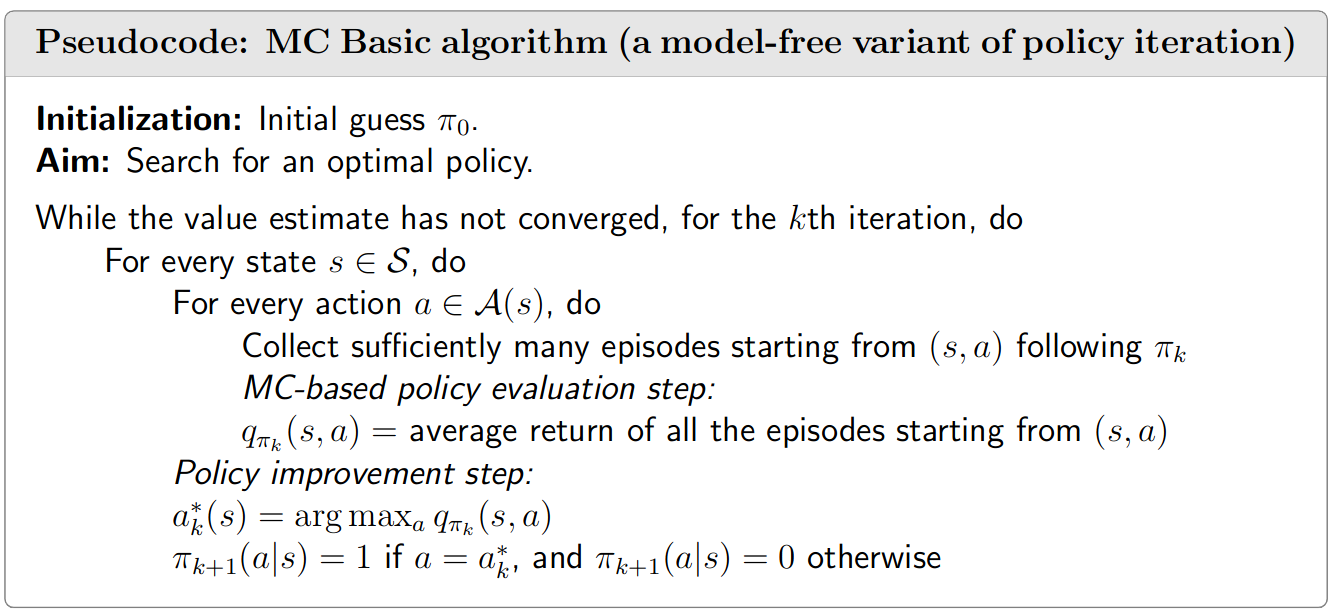

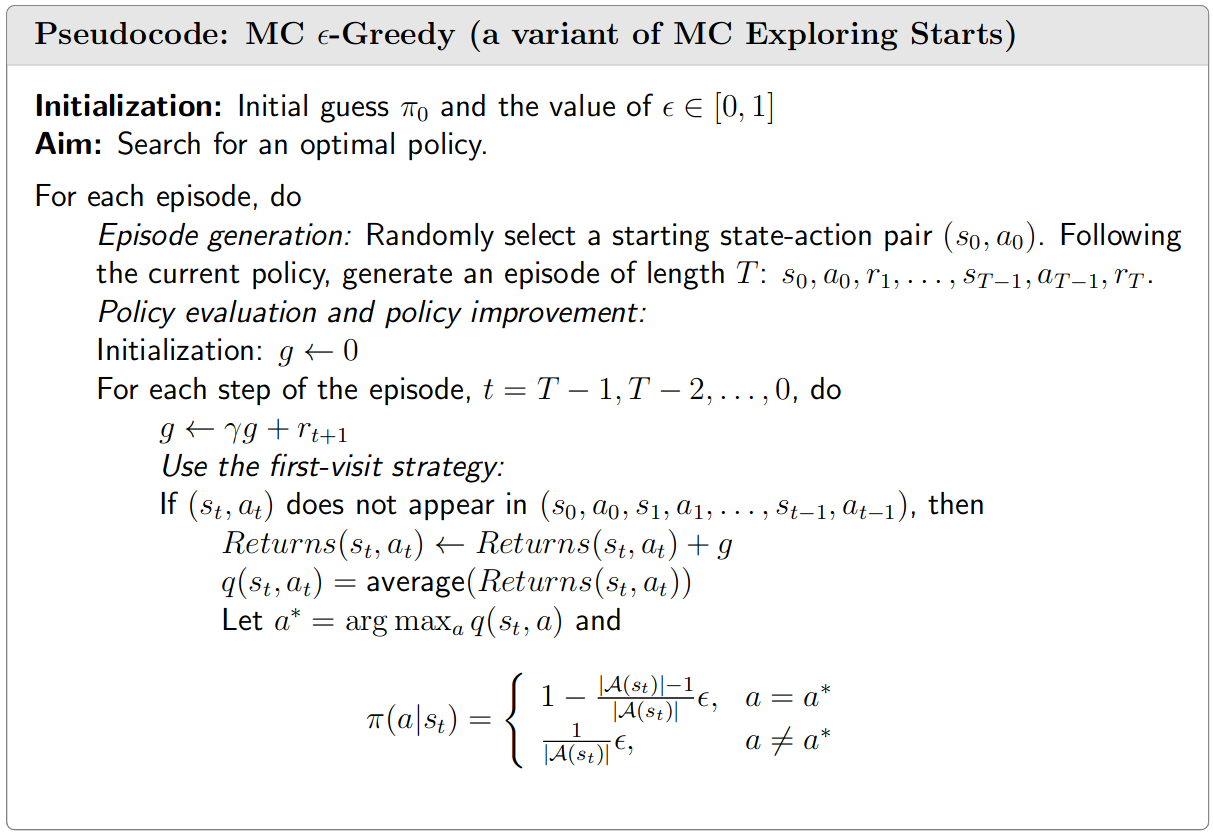

In [4]:
# parameter
cfg_params = {
    "env_name" : "CliffWalking-v0",
    "random_seed": 0,
    "max_train_steps": 1000,
    "max_episode_steps": 1500,
}

env = gym.make(cfg_params["env_name"]) #  gym.make("CliffWalking-v0", render_mode="human")


Environment Model
$p(r_k\vert s_k, a_k)\\p(s_{k+1}\vert s_k, a_k)$

In [ ]:
# make it as a funtion for data analysis


agent = Agent(
    action_dim=env.action_space.n,
    state_dim=env.observation_space.n,
    alpha=0.2,
    gamma=0.9,
    epsilon=0.5)

# training
score_queue = []

for k in range(cfg_params["max_train_steps"]):
    # reset t  he s_k
    data_queue = []
    s_k, info = env.reset(seed=cfg_params["random_seed"])
    # collect data set
    for ek in range(cfg_params["max_episode_steps"]):
        a_k = agent.select_action(s_k)
        s_k1, r_k, terminated, truncated, info = env.step(a_k)
        data_queue.append([s_k, a_k, r_k])
        if terminated:
#             print(f"s_k: {s_k}, s_k1: {s_k1}, r_k: {r_k}, a_k: {a_k}, e_k : {ek}, terminated: {terminated}")
            break
        s_k = s_k1
    
    agent.MonteCarlo_train(data_queue)

    score = evaluate_policy(env, agent)
    score_queue.append(score)
    print(f'current step: {k}/{cfg_params["max_train_steps"]}, score: {score}')

# if render:
#     evaluate_env = gym.make(cfg_params["env_name"], render_mode="human")
#     for _ in range(1):
#         evaluate_policy(evaluate_env, agent)
#     evaluate_env.close()
# print(Returns)


In [21]:
print(agent.Counts)

[[ 954.  961.  939.  940.]
 [ 810.  918.  838.  939.]
 [ 864.  888.  741.  779.]
 [ 817.  801.  588.  611.]
 [ 255.  847.  245.  265.]
 [ 321.  849.  329.  335.]
 [ 320.  793.  315.  340.]
 [ 281.  798.  280.  291.]
 [ 500.  608.  429.  384.]
 [ 473.  355.  351.  289.]
 [ 140.  320.  193.  178.]
 [ 120.  116.  231.  242.]
 [ 968.  841.  816.  782.]
 [ 860.  609.  593.  583.]
 [ 788.  372.  348.  359.]
 [ 602.  225.  210.  242.]
 [ 339.  117.   94.  124.]
 [ 437.  153.  142.  140.]
 [ 106.   91.   97.  307.]
 [ 318.  108.  113.   93.]
 [ 135.  322.  130.  176.]
 [ 124.  484.  133.  120.]
 [ 113.  495.  141.  129.]
 [ 134.  134.  630.  119.]
 [ 968.  546.  487.  512.]
 [ 650.  231.  234.  233.]
 [ 355.  106.   97.  105.]
 [ 203.   65.   55.   50.]
 [  79.   34.   26.   45.]
 [ 127.   33.   32.   35.]
 [  71.   17.   24.   46.]
 [  79.   26.   30.   26.]
 [ 102.   42.   23.   26.]
 [  38.  123.   35.   30.]
 [  85.  191.   49.   53.]
 [ 123.  120.  713.  124.]
 [1000.  376.  326.  348.]
 

In [64]:
# play and render
plt.figure()
score_queue = main_function(alpha = 0.2, gamma=0.9, render=True)
evaluate_policy
plt.plot(score_queue, label="Q")

plt.ylabel('score')
plt.xlabel('step')
plt.title('Q-Learning')
plt.legend()

NameError: name 'main_function' is not defined

<Figure size 640x480 with 0 Axes>

In [11]:
evaluate_env = gym.make(cfg_params["env_name"], render_mode="human")
evaluate_policy(evaluate_env, agent)

s_k: 36, s_k1: 24, r_k: -1, terminated: False
s_k: 24, s_k1: 12, r_k: -1, terminated: False
s_k: 12, s_k1: 0, r_k: -1, terminated: False
s_k: 0, s_k1: 0, r_k: -1, terminated: False
s_k: 0, s_k1: 0, r_k: -1, terminated: False
s_k: 0, s_k1: 0, r_k: -1, terminated: False
s_k: 0, s_k1: 0, r_k: -1, terminated: False
s_k: 0, s_k1: 0, r_k: -1, terminated: False
s_k: 0, s_k1: 0, r_k: -1, terminated: False
s_k: 0, s_k1: 0, r_k: -1, terminated: False
s_k: 0, s_k1: 0, r_k: -1, terminated: False
s_k: 0, s_k1: 0, r_k: -1, terminated: False
s_k: 0, s_k1: 0, r_k: -1, terminated: False
s_k: 0, s_k1: 0, r_k: -1, terminated: False
s_k: 0, s_k1: 0, r_k: -1, terminated: False
s_k: 0, s_k1: 0, r_k: -1, terminated: False
s_k: 0, s_k1: 0, r_k: -1, terminated: False
s_k: 0, s_k1: 0, r_k: -1, terminated: False
s_k: 0, s_k1: 0, r_k: -1, terminated: False
s_k: 0, s_k1: 0, r_k: -1, terminated: False
s_k: 0, s_k1: 0, r_k: -1, terminated: False
s_k: 0, s_k1: 0, r_k: -1, terminated: False
s_k: 0, s_k1: 0, r_k: -1, t

KeyboardInterrupt: 

In [19]:
aaaa = np.array([i for i in range(48)]).reshape(4,12)
print(aaaa)

[[ -11.56867633  -11.67047071  -12.24525819  -11.37655919]
 [ -12.03086815  -12.4096081   -14.76171954  -11.47103082]
 [ -11.95335215  -13.01986245  -14.78463301  -12.08781245]
 [ -12.61362006  -12.92627973  -16.20825043  -13.12615375]
 [ -13.4240367   -12.8587694   -17.043989    -13.48165654]
 [ -14.36610348  -13.03149618  -15.3621149   -14.23394903]
 [ -13.51594366  -12.45861588  -17.07592382  -13.3141175 ]
 [ -12.65542673  -12.13248055  -15.93864206  -12.63411528]
 [ -12.28823527  -11.57190194  -16.60518477  -12.29892429]
 [ -11.10116299  -12.09516805  -13.074235    -12.2043923 ]
 [ -12.09438581   -9.90835544  -13.33207414  -14.7930259 ]
 [ -12.09405597  -11.57306231   -9.56868966  -11.06257887]
 [ -11.31734965  -14.62597203  -18.059233    -12.31059363]
 [ -12.45502391  -15.33704395  -29.94538602  -13.63546984]
 [ -12.1938431   -15.8962062   -31.40838219  -16.39270244]
 [ -13.17431603  -15.58814827  -37.08756832  -17.10892896]
 [ -12.86136448  -16.96031566  -32.18005209  -13.7370513